Data preprocessing techniques :
1. Removing and imputing missing values from the dataset
2. Getting categorical data into shape for machine learning algorithm [it learns well with numerical data]
3. Selecting relevant features for model construction

In [2]:
import pandas as pd
from io import StringIO

csv_data = """ A, B, C, D
               1.0,2.0,3.0,4.0
               5.0,6.0,,8.0
               9.0,10.0,11.0,"""
df = pd.read_csv(StringIO(csv_data))
df


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,9.0,10.0,11.0,NaN


csv_data is stroed as a string of comma separated values. StringIO converts it into a format which makes it possible to read the content as a pandas dataframe as if it is stored on hard drive as a csv file.

In [ ]:
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


it can be tedious to look manually through the dataframe to find missing values -> isnnull() picks those values which are NaN (not a number) and sum() computes number of nans columnwise

it can be convenient to work with pandas dataframe in tabular datasets and the numpy arrays can be extracted easily from them.

In [ ]:
df.values


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [ 9., 10., 11., nan]])

In [ ]:
#Eliminating samples or features with missing values
df.dropna(axis=0) # drop rows containing missing values


,A,B,C,D
0,1.0,2.0,3.0,4.0


This can be harmful because we are missing out on a lot of data by removing entire row if it has missing values.

In [ ]:
df.dropna(axis=1) #drop column if it has missing values.

,A,B
0,1.0,2.0
1,5.0,6.0
2,9.0,10.0


In [ ]:
#dropna comes with additional handy parameters.
df.dropna(how='all') # remove rows where all values are NAN


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,9.0,10.0,11.0,NaN


In [ ]:
df.dropna(thresh=4) # drop values with less than 4 real values

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
df.dropna(subset=[' C']) # drop values with nan values in column

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,9.0,10.0,11.0,NaN


Imputing missing values:
How to compensate for missing values with reasonably good values -> there are techniques for these \
Simply taking out the missing values will reduce the content of our dataset and this will not help the machine learning algorithm to learn.

One of the common strategies is to do mean imputation : replace the missing values with mean of the values in the column.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df.values)
imputed_data = imp.transform(df.values)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11.,  6.]])

Imputer class is part of the Transformer classes which are used for data transformation. the two methods found in these estimators are the fit and transform method. The classifier apis of sklearn also are similar to these transformer class apis with fit learning the pattern in the input data and predict predicting the labels given test data.

Handling categorical data \
Some machine learning dataset features will be categorical like a t-shirt's color, t-shirt's size. these cannot be represented by a continuous number , instead need to be converted to a numerical format. Again, features could be ordinal or nominal. \
Ordinal : there is an order in the classification -> like t-shirt size : S < M < L < XL etc, and nominal means there is no order and the classes are independent -> t-shirt color like red, green etc


In [ ]:
import pandas as pd
df = pd.DataFrame([
           ['green', 'M', 10.1, 'round'],
           ['red', 'L', 13.5, 'collar'],
           ['blue', 'XL', 15.3, 'round']])
df.columns = ['color','size', 'price', 'neck']
df

,color,size,price,neck
0,green,M,10.1,round
1,red,L,13.5,collar
2,blue,XL,15.3,round


There are three categorical features and one numerical feature. Out of two categorical features , one of them is ordinal feature and a map is required for the ML algorithm to understand order.

In [ ]:
mapping_size = {'M':1, 'L':2, 'XL' : 3}
df['size'] = df['size'].map(mapping_size)
df

,color,size,price,neck
0,green,1,10.1,round
1,red,2,13.5,collar
2,blue,3,15.3,round


In [ ]:
# to map back to the original features, we can have a reverse lookup
inv_size_mapping = {v:k for k,v in mapping_size.items()}
df['size'].map(inv_size_mapping)

,size
0,M
1,L
2,XL


In [ ]:
#Encoding neck labels -> order does not matter -> there is no numerical relationship between labels
neck_mapping = {'round':0,'collar':1}
neck_mapping



{'round': 0, 'collar': 1}

In [ ]:
df['neck'] = df['neck'].map(neck_mapping)
df

,color,size,price,neck
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [ ]:
inv_neck_mapping = {v:k for k,v in neck_mapping.items()}
df['neck'].map(inv_neck_mapping)

,neck
0,round
1,collar
2,round


In [ ]:
# the same can be done using the LabelEncoder API available in sklearn library
from sklearn.preprocessing import LabelEncoder
neck_labelencoder = LabelEncoder()
y = neck_labelencoder.fit_transform(df['neck'].values) # fit + transform together
y

array([1, 0, 1])

In [ ]:
neck_labelencoder.inverse_transform(y)

array(['round', 'collar', 'round'], dtype=object)

In [ ]:
df

,color,size,price,neck
0,green,1,10.1,round
1,red,2,13.5,collar
2,blue,3,15.3,round


In [ ]:
X = df[['color', 'size','price']].values

In [ ]:
color_labelencoder = LabelEncoder()

In [ ]:
X[:,0] = color_labelencoder.fit_transform(X[:,0])

In [ ]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

One hot encoding : converting the integer labels to one-hot encoding \

When we pass the data to a label encoder,it will assign integer labels to the categorical data . For nominal features, which have no hierarchy between them, this might prove to be a mistake , for example, t-shirt colors blue, green, white might be encoded as 0,1,2 and the classifier might assume that blue < green < white but actually there is no such relationship.  \
In such cases, one-hot encoding helps , where 1 is assigned to the color if the color is blue and others are assigned zero.


In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder', OneHotEncoder(), [0])])

OneHotEncoder(categorical_features=[0]) -> this is deprecated in the current sklearn version. Alternately OnHotEncoder can be used with ColumnTransformer to fit_transform data in the required column.

In [ ]:
ct.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [ ]:
df

,color,size,price,neck
0,green,1,10.1,round
1,red,2,13.5,collar
2,blue,3,15.3,round


Another convenient way to transform columns into one-hot encoded values is to use get_dummies API in pandas.

In [ ]:
pd.get_dummies(df[['price', 'size', 'color']]) # the usual practice is to keep categorical nominal features in the end.

,price,size,color_blue,color_green,color_red
0,10.1,1,False,True,False
1,13.5,2,False,False,True
2,15.3,3,True,False,False


The one-hot encoding introduces another problem -> the problem of multi-collinearity. What happens is that we introduce features that are collinear and hence it becomes harder to do matrix inversion. To prevent redundancy, we remove the one of the three columns,  if it is green, the columns go 0,1, if it is white they go 1,0 and if it is red, they go 0,0 -> implicitly saying that it is red.

In [ ]:
pd.get_dummies(df[['price','size','color']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,True,False
1,13.5,2,False,True
2,15.3,3,False,False


To do the same in numpy array using OneHotEncoder -> use slicing to do the same.

In [ ]:
ct.fit_transform(X)[:,1:]

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

Partitioning a dataset into training and test set

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                             'ml/machine-learning-databases/'
                             'wine/wine.data', header=None)



In [5]:
df_wine.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df_wine.columns = ['Class label', 'Alcohol',
               'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                 'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
               'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                     'Proline']

In [7]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df_wine.shape

(178, 14)

In [8]:
import numpy as np

In [9]:
print(np.unique(df_wine['Class label']))

[1 2 3]


A way to split the data into train and test data is to use sklearn's train_test_split function, which is also capable of doing stratified sampling.

In [12]:
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

Split is a trade-off .if we put too much data to test_set, we are withholding data which could be learnt if it was in training set. But , having too little test data would not help us gauge the performance of the learning algorithm. \
So , a 70-30 or 80-20 split is fine for smaller datasets. for industry level datasets, 90-10 or even 99-1 should be sufficient

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

Feature scaling : \
For majority of algorithms to learn and adjust weights, the features should be on same scale -> decision trees adn random forest are exceptions since they perform a discrete search and do not rely on backprop. But algos like svm, logistic regression need feature scaling

Two different methods of feature scaling : \
Normalization and Standardization - Normalization refers to scaling the data in the range [0-1] by making use of min-max. \
$x_{norm}^{(i)} = \frac{x^{(i)} - x_{min}}{x_{max} - x_{min}}$, where x_{max} and x_{min} are the min and max values in the column of the dataset.

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

Min-Max scaling also called Normalization can be useful to solve the scaling problem, but Standardization is preferred to this because the weights are usually zeros initially or randomly set to very small values near zero. If the inputs to the model are standardized centering around mean with unit standardization, it is a normal distribution and training is more robust. \
Also, standardization gives more scope for outliers to have their influence adding some noise to data preventing overfitting, whereas normalization forcefully makes every value take the narrow range of [0,1] removing noise completely.

In [15]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [16]:
print('normalized : '  , (ex - ex.min())/ (ex.max() - ex.min()))

normalized :  [0.  0.2 0.4 0.6 0.8 1. ]


In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

Selection of meaningful features: \
If a model performs well on training set, but performs poorly on test_set, it is an indication that the model is overfitting on the data. Common solutions to the overfitting problem is :\
1. Get more data
2. Regularize the model
3. Choose a simpler model with fewer parameters
4. Select fewer importatn features instead of feeding all the features.


Regularization : \
L1 and L2 regularization as penalties against model complexities.

$L2 : ||w||_2^2 = \sum _{j=1}^{m} w_j^2$ \
$L1 : ||w||_1 = \sum _{j=1}^{m} |w|$

Sparsity :  L1 regularization usually gives rise to sparse feature vectors with many weights going to zero. So, it is a sort of feature extractor where some features are taken out due to weights being zero.

The intersection of circular L2 regularization plot and contour plot happens at a point which is a tradeoff between minimum weights and minimum cost and the same way for L1 regression it is a point of intersection of diamond plot [with sharp edges] . in the second case,the probability of intersection point being on the axes is more, hence the sparsity of weights.

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',C = 1.0,solver='liblinear') # default solver is lbfgs which supports only l2 or non penalty ,liblinear support both
lr.fit(X_train_std, y_train)
print("Training accuracy : ",lr.score(X_train_std, y_train))
print("Test accuracy : ",lr.score(X_test_std, y_test))



Training accuracy :  1.0
Test accuracy :  0.9814814814814815


In the above example, training accuracy is 100 percent and test_accuracy is around 98 percent. Let us observe the bias and weights after regularization

In [17]:
lr.intercept_


array([-1.38399226, -0.94500252, -2.34920647])

In [18]:
lr.coef_

array([[ 1.42608839,  0.14077644,  0.70949155, -1.26051859,  0.        ,
         0.        ,  1.38395024,  0.        , -0.0560427 ,  0.        ,
         0.        ,  0.43213495,  1.98007022],
       [-1.46237778, -0.4395358 , -1.21203811,  0.61591314,  0.        ,
         0.        ,  0.        ,  0.        ,  0.64865805, -1.70523781,
         1.22758645,  0.        , -1.98230925],
       [ 0.        ,  0.39653248,  0.328761  ,  0.        ,  0.        ,
         0.        , -2.25193733,  0.        , -0.07212002,  1.71096342,
        -1.09209599, -0.15766127,  0.        ]])

we see that the lr.coef_ has many zero weights due to introduction of l1 regularization, let us conduct some experiments with this.

First let us check a non-regularized model.

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
print("Training accuracy : ",lr.score(X_train_std, y_train))
print("Test accuracy : ",lr.score(X_test_std, y_test))
print(lr.coef_)
print(lr.intercept_)

Training accuracy :  1.0
Test accuracy :  0.9814814814814815
[[ 0.74554303  0.09200655  0.39952025 -0.83270352  0.11173747  0.32384292
   0.67270761  0.0037452  -0.00203717  0.0905956   0.06107239  0.56664939
   0.86971516]
 [-0.95421747 -0.38106692 -0.774895    0.59321275 -0.18907112 -0.12048278
   0.1965673  -0.00568903  0.54567422 -0.80462331  0.70482081 -0.00775844
  -0.93926502]
 [ 0.20867444  0.28906037  0.37537474  0.23949077  0.07733365 -0.20336014
  -0.86927491  0.00194383 -0.54363706  0.71402772 -0.7658932  -0.55889096
   0.06954986]]
[ 0.34312741  0.82719355 -1.17032096]


same accuracy of test set , but weights are non-sparse -> no zeros in coef_

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2',C=0.05)
lr.fit(X_train_std, y_train)
print("Training accuracy : ",lr.score(X_train_std, y_train))
print("Test accuracy : ",lr.score(X_test_std, y_test))
print(lr.coef_)
print(lr.intercept_)

Training accuracy :  0.9919354838709677
Test accuracy :  1.0
[[ 0.33341377 -0.01430034  0.14337305 -0.30226171  0.07308419  0.20341781
   0.29622394 -0.08960528  0.02833287  0.07103269  0.0844859   0.22343688
   0.40930812]
 [-0.4186607  -0.16431385 -0.25850147  0.18801922 -0.09228272 -0.02429103
   0.04412885 -0.0269175   0.1657265  -0.37596574  0.22952986  0.09879626
  -0.36301655]
 [ 0.08524693  0.17861419  0.11512843  0.11424249  0.01919853 -0.17912677
  -0.34035279  0.11652278 -0.19405937  0.30493305 -0.31401577 -0.32223314
  -0.04629158]]
[ 0.0531411   0.45427305 -0.50741414]


With heavy l2 regularization , a better accuracy on test set is obtained with some drop in accuracy in training set, but the weights are all non-zeros still with values being low.

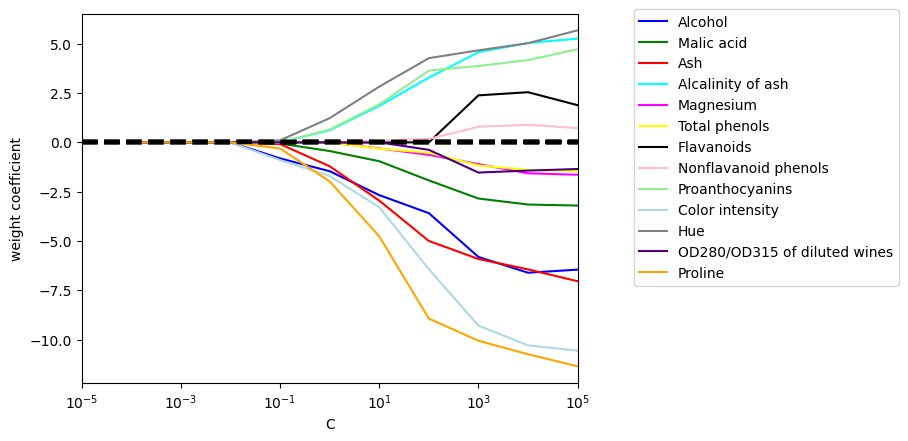

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
             'magenta', 'yellow', 'black',
             'pink', 'lightgreen', 'lightblue',
             'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
  lr = LogisticRegression(penalty='l1', C = 10. ** c, solver = 'liblinear')
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10 ** c)
weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:,column], label=df_wine.columns[column+1], color=color)
    plt.axhline(0, color='black', linestyle='--', linewidth=3)
    plt.xlim([10**(-5), 10**5])
    plt.ylabel('weight coefficient')
    plt.xlabel('C')
    plt.xscale('log')
    plt.legend(loc='upper left')
    ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
           ncol=1, fancybox=True)
plt.show()

Sequential Feature selection :
There is another way of reducing the overfitting of our model for the given data and it is reducing the dimensionality of our data using feature selection/extraction methods. in feature selection, we select a subset of the features whereas in feature extraction, we extract new features from the existing feature space which might help form meaningful decisions.

A classic sequential feature selection algorithm is Sequential Backward Selection (SBS). It tried to remove features in a backward fashion without disturbign the model's performance imrpoving the model's computational costs in the process. In some cases, this can improve the predictive power of the model if the initial model has overfitting issues.

Greedy algorithms make locally optimal choices at each stage of
a combinatorial search problem and generally yield a suboptimal solution to the problem, in contrast to exhaustive search algorithms,which offers the optimal solution. However, in practice, an exhaustive search is often computationally not feasible, whereas greedy algorithms allow for a less complex, computationally more efficient solution.

Sequential Backward Selection algorithm: \
1. Initialize the algorithm with k = d, where d is the full dimensionality of the feature space $X_d$.
2. Determine the feature $x^-$ that maximizes the criterion : $x^-$ = argmax $J (X_k - x)), where x \in X_k$ \
3. Remove the feature $x^-$ from the feature space $X_{k-1} = X_{k} and k = k-1
4. Terminate if k equals the required number of features, else go to step 2


In [48]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

    dim = X_train.shape[1]
    print(dim)
    self.indices_ = list(range(dim))
    self.subsets_ = [self.indices_]

    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_ = [score]

    while dim > self.k_features:
      scores = []
      subsets = []
      for p in combinations(self.indices_, r=dim-1):
        score = self._calc_score(X_train, y_train, X_test,y_test, p)
        scores.append(score)
        subsets.append(p)
      max_score = np.argmax(scores)
      self.indices_ = subsets[max_score]
      self.subsets_.append(self.indices_)
      dim-=1
      self.scores_.append(scores[max_score])
    return self

  def transform(self, X):
    return X[:,self.indices_]

  def _calc_score(self, X_train, y_train, X_test, y_test, indices):
    self.estimator.fit(X_train[:,indices], y_train)
    y_out = self.estimator.predict(X_test[:,indices])
    score = self.scoring(y_test, y_out)
    return score




In [41]:
X_train_std.shape, y_train.shape

((124, 13), (124,))

In [49]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

13


In [50]:
sbs.subsets_

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11),
 (0, 1, 2, 3, 5, 6, 7, 8, 9, 10),
 (0, 1, 2, 3, 5, 6, 7, 8, 10),
 (0, 1, 2, 3, 5, 6, 7, 10),
 (0, 1, 2, 3, 5, 6, 10),
 (0, 1, 2, 3, 6, 10),
 (0, 2, 3, 6, 10),
 (0, 2, 3, 6),
 (0, 3, 6),
 (0, 6),
 (0,)]

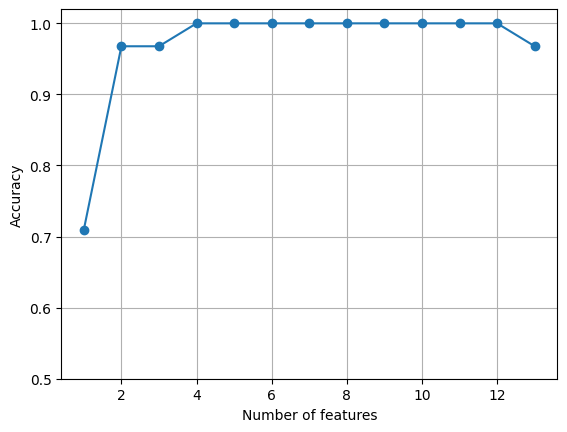

In [51]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

we see that when we had all features, the accuracy is not 100 percent, when reduced it goes to 100 percent with knn classifier because knn struggles with curse of dimensionality. the least number of features with which 100 percent accruracy is reached is 4, we ll see which are thos features which contribute towards learning of patterns in this dataset

In [52]:
k4 = list(sbs.subsets_[9])

In [53]:
k4

[0, 2, 3, 6]

In [55]:
df_wine.columns[1:] #training input columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [56]:
df_wine.columns[1:][k4]

Index(['Alcohol', 'Ash', 'Alcalinity of ash', 'Flavanoids'], dtype='object')

Alcohol, Ash, Alcanity of ash, Flavonoids -> these contribute most in classification of wine labels.

In [57]:
#let us put to test our Sequential Backward Selected model to original test set
#Original model on original dataset
knn.fit(X_train_std, y_train)
print("Training accuracy : ", knn.score(X_train_std, y_train))
print("Test accuracy : ", knn.score(X_test_std, y_test))

Training accuracy :  0.9838709677419355
Test accuracy :  0.9629629629629629


In [58]:
# 4 feature dataset with original model
knn.fit(X_train_std[:,k4], y_train)
print("Training accuracy : ", knn.score(X_train_std[:,k4], y_train))
print("Test accuracy : ", knn.score(X_test_std[:,k4], y_test))

Training accuracy :  0.9758064516129032
Test accuracy :  0.9074074074074074


The training and test accuracy has reduces after feature selection, meaning we may have removed more than what is required or maybe the wine dataset is too small to experiment with sequential backward selection procedure. let us try with 8 features

In [59]:
k8 = list(sbs.subsets_[5])

In [60]:
# 8 feature dataset with original model
knn.fit(X_train_std[:,k8], y_train)
print("Training accuracy : ", knn.score(X_train_std[:,k8], y_train))
print("Test accuracy : ", knn.score(X_test_std[:,k8], y_test))

Training accuracy :  0.9596774193548387
Test accuracy :  0.9444444444444444


This performs better than 4 feature but still training accuracy is lower and test_accuracy is still lower than original features.

sklearn has some other feature selector algorithms like recursive backward elimination, tree based search methods etc which can be tried.

In [63]:
#Using sklearn's recursive feature selection
from sklearn.feature_selection import SelectFromModel
knn=KNeighborsClassifier(n_neighbors=5)
sfm = SelectFromModel(estimator=knn, max_features=1)
sfm.fit(X_train_std, y_train)

SelectFromModel(estimator=KNeighborsClassifier(), max_features=1)

In [64]:
sfm.n_features_in_

13

In [66]:
sfm.max_features_

1

In [69]:
X_partial_std = X_train_std.copy()

In [70]:
sfm.transform(X_partial_std)

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

K nearest neighbors has no attribute coef_ or feature_importances_ attribute which is required by Recursive feature selector or SelectFromModel API


Assessment of feature importance using Random Forest algorithm:



Using random forest algorithm, we can measure the importance of the features as an average of impurity decrease computed from all the decision trees in the forest without any assumption as to whether the data is linearly separable or not. \
Luckily, the RandomForestClassifier already computes the feature_importance_ attribure in sklearn and this can be used to help us understand the importance of each of the features in the dataset.

In [72]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
                             random_state=1) # a forest of 500 decision trees
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [73]:
importances = forest.feature_importances_

In [74]:
importances

array([0.13827999, 0.02883434, 0.01497215, 0.03114746, 0.034068  ,
       0.04641771, 0.13792735, 0.0110286 , 0.02527738, 0.17299384,
       0.08386165, 0.12043978, 0.15475173])

In [75]:
indices_ = np.argsort(importances)[::-1] # sort in descending order
indices_

array([ 9, 12,  0,  6, 11, 10,  5,  4,  3,  1,  8,  2,  7])

In [81]:
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices_[f]], importances[indices_[f]]))

 1) Color intensity                0.172994
 2) Proline                        0.154752
 3) Alcohol                        0.138280
 4) Flavanoids                     0.137927
 5) OD280/OD315 of diluted wines   0.120440
 6) Hue                            0.083862
 7) Total phenols                  0.046418
 8) Magnesium                      0.034068
 9) Alcalinity of ash              0.031147
10) Malic acid                     0.028834
11) Proanthocyanins                0.025277
12) Ash                            0.014972
13) Nonflavanoid phenols           0.011029


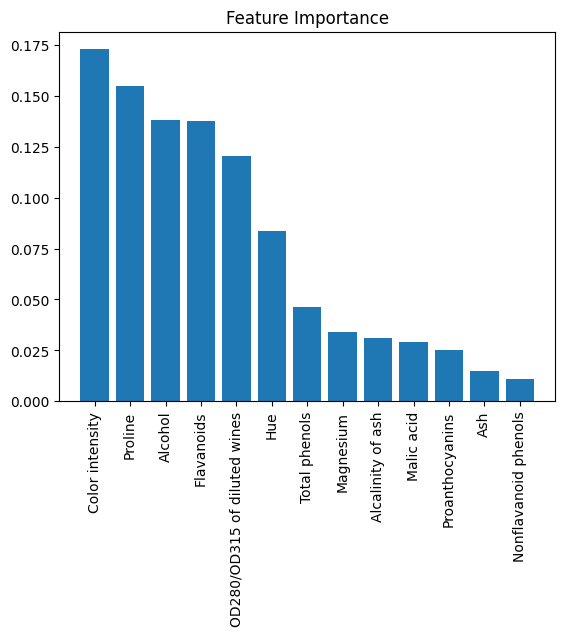

In [82]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices_], align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices_], rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.show()

we see that Color intensity, Proline,Alcohol, Flavonoids are very important features [discriminative].

SelectFromModel class of sklearn can be used to select only those features which have importance scores greater than a certain threshold and transform our dataset to use only those features -> these can be piped together as a single chain of algorothms.

In [83]:
X_train.shape[0]

124

In [84]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

In [85]:
X_selected.shape[1]

5

In [87]:
for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f+1, 30, feat_labels[f], importances[f]))

 1) Alcohol                        0.138280
 2) Malic acid                     0.028834
 3) Ash                            0.014972
 4) Alcalinity of ash              0.031147
 5) Magnesium                      0.034068
